In [7]:
"""
Takes a small subset of the data, and then makes a graph based off of nodes of ingredients and molecules
"""

#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import random 
from collections import defaultdict

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx

In [25]:
#accessing mongoDB
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['flavor_molecules']

#Getting the dataset from MongoDB into Pandas
flavorDB_pandas = pd.DataFrame(list(collections.find()))
flavorDB_pandas = flavorDB_pandas[["_id", "ingredient", "catgeory", "molecules", "molecule_IDs"]]

#Making each list into a set
flavorDB_pandas["set_molecules"] = flavorDB_pandas["molecules"].apply(lambda row: set(row))
flavorDB_pandas["set_molecules_ID"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: set(row))
flavorDB_pandas["molecule_quantity"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: len(row))


In [26]:
flavorDB_pandas.head()

,_id,ingredient,catgeory,molecules,molecule_IDs,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Egg,Animal Product,"[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","{2-Methylpyrazine, Nonanal, Octan-2-one, Pyrro...","{12266, 18554, 379, 12020, 612, 12097, 7909, 5...",55
1,5ca27b9113218a1eabac63d7,Bakery Products,Bakery,"[2,3-Dimethylpyrazine, 2,5-Dimethylpyrazine, 2...","[22201, 31252, 26331, 27457, 7976, 26808]","{2-Methylpyrazine, 2-Ethylpyrazine, 2-Ethyl-3-...","{31252, 26331, 7976, 27457, 22201, 26808}",6
2,5ca27b9213218a1eabac63d8,Bread,Bakery,"[coumarin, Methyl Benzoate, 3-Hexanone, Gerani...","[323, 7150, 11509, 637566, 439341, 33931, 9261...","{Nonanal, (+)-delta-Cadinene, 2-Furaldehyde, 2...","{6072, 31260, 10430, 6184, 439341, 61503, 5363...",129
3,5ca27b9313218a1eabac63d9,Rye Bread,Bakery,"[2-Methylbutyl Acetate, 3-methylthiopropanol, ...","[12209, 10448, 5372954, 8468, 643731, 7344, 18...","{3658-77-3, Nonanoic Acid, Damascenone, 2-Meth...","{460, 12020, 72, 8094, 8908, 999, 643731, 7997...",30
4,5ca27b9413218a1eabac63da,Wheaten Bread,Bakery,"[Difurfuryl ether, 2-Undecanone, Octyl acetate...","[263034, 8163, 8164, 12170, 228583, 9589, 6375...","{3-Acetylpyridine, Octyl acetate, Pyrrole, 2-O...","{8164, 8163, 7895, 8027, 26334, 30914, 7958, 2...",30


In [22]:
G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if True: # or len(set1) < 5: # To set if you want to consider all ingredients
        for molecule in set1:
            G.add_node(ingredient_1)
            G.node[ingredient_1]["ingredient_node"] = True
            G.add_node(molecule)
            G.node[molecule]["molecule_node"] = True
            G.add_edge(ingredient_1, molecule)

with open('nb_full_graph.pickle', 'wb') as file:
    file.write(pickle.dumps(G))
    file.close()

#Celebratory print statement
print("we did it!")

we did it!


In [23]:
#Opening the pickled file
pickle_in = open("nb_full_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

print(G.number_of_edges())
print(G.number_of_nodes())

60027
2714


In [18]:
#Creation of the Flavor Matrix
flavor_matrix_df = defaultdict(dict)

#Making a list of random numbers with a certain seed
random.seed(50)
random_samples_to_972 = random.sample(range(973), 50)
random_samples_to_972.sort()

G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #to see if it is in the random sample
    if index in random_samples_to_972:
        #might incorporate this might not
        list_of_shared_molecules = []
        list_of_number_of_shared_molecules = []
        
        #set of the ingredient from the "rows"
        set1= row["set_molecules"]
        #name of the ingredient from the "rows" 
        ingredient_1 = row["ingredient"]
        
        if len(set1) < 3:
            for molecule in set1:
                # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
                G.add_node(ingredient_1)
                G.node[ingredient_1]["ingredient_node"] = True
                G.add_node(molecule)
                G.node[molecule]["molecule_node"] = True
                G.add_edge(ingredient_1, molecule)

with open('nb_subset_graph.pickle', 'wb') as file:
    file.write(pickle.dumps(G))
    file.close()

#Celebratory print statement
print("we did it!")

we did it!


In [19]:
#Opening the pickled file
pickle_in = open("nb_subset_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

print(G.number_of_edges())
print(G.number_of_nodes())





9
8


In [20]:
ingredient_nodes = nx.get_node_attributes(G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(G, 'molecule_node').keys()
print('Ingredient nodes ids: {}'.format(ingredient_nodes))
print('Molecule nodes ids: {}'.format(molecule_nodes))


Ingredient nodes ids: dict_keys(['Cedar', 'Florida pompano', 'Leather chiton', 'Walleye', 'Succotash'])
Molecule nodes ids: dict_keys(['D-Fenchone', 'CID 644104', 'thiamine'])


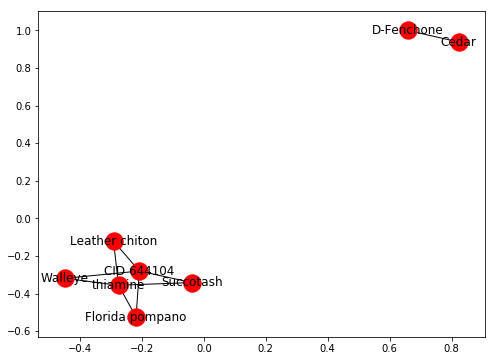

In [21]:
#Plotting the Graph 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(G, ax=ax)
plt.show()